In [15]:
from sympy import Symbol, Derivative, pprint
from sympy import init_printing
import numpy as np

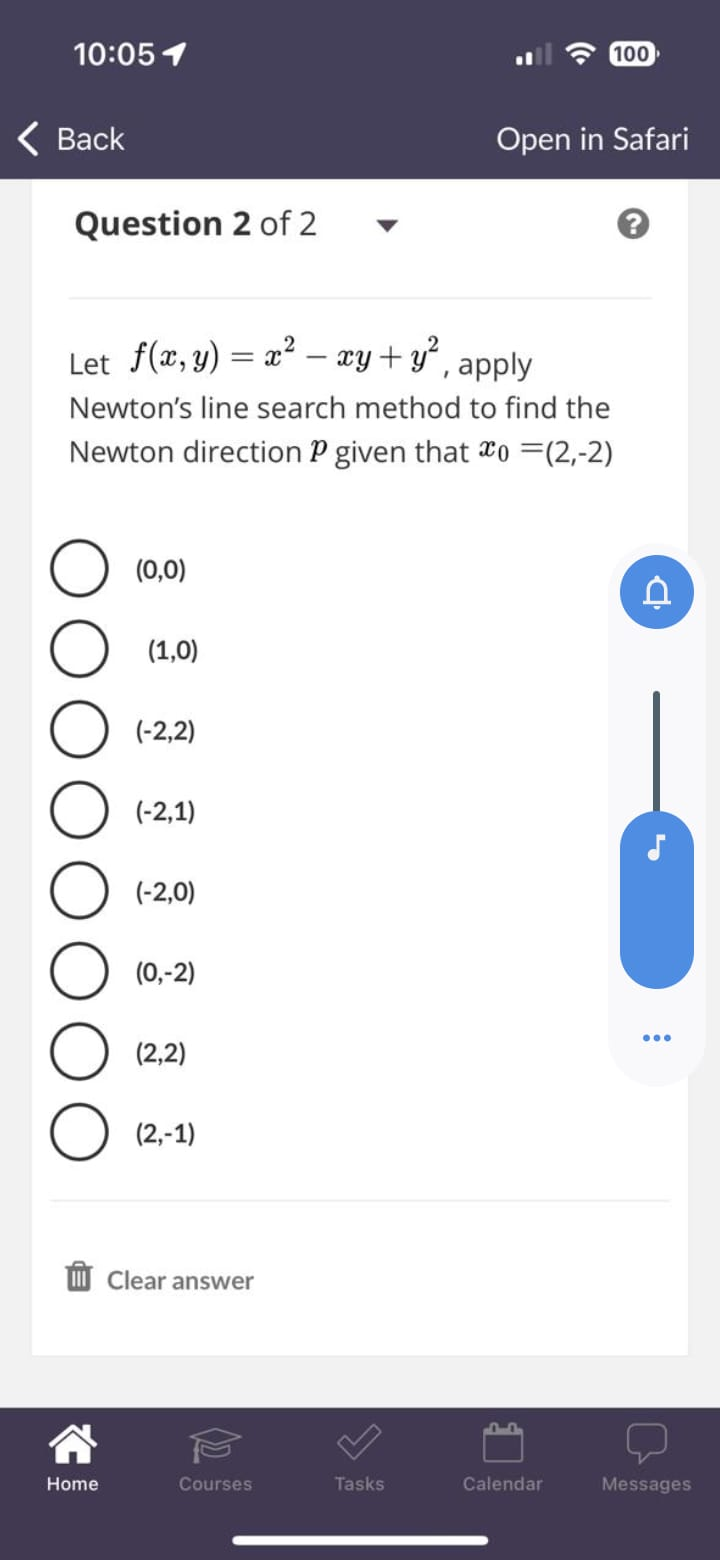

In [16]:
# we will apply newton's line search method
# f(x,y) = x**2 - xy + y**2
# x_0 = 2, y_0 = -2

# define the symbols
x = Symbol('x')
y = Symbol('y')

variables = [x, y]

# define the function
f = x**2 - x*y + y**2

initial_point = np.array([2, -2])

num_of_variables = len(variables)

f


x**2 - x*y + y**2

In [17]:
# gradient of f
grad_f = [Derivative(f, var).doit() for var in variables]
grad_f

[2*x - y, -x + 2*y]

In [18]:
hessian_f = [[Derivative(grad_f[i], var).doit() for var in variables] for i in range(num_of_variables)]
hessian_f

[[2, -1], [-1, 2]]

In [19]:
inverse_hessian_f = np.linalg.inv(np.array(hessian_f, dtype=np.float64))
inverse_hessian_f


array([[0.66666667, 0.33333333],
       [0.33333333, 0.66666667]])

In [20]:
# we gotta fill the gradient with initial values
# x_0 = 2, y_0 = -2
grad_f_initial_point = [grad_f[i].subs({variables[i]: initial_point[i] for i in range(num_of_variables)}) for i in range(num_of_variables)]
grad_f_initial_point


[6, -6]

In [21]:
newton_direction = -1 * inverse_hessian_f @ np.array(grad_f_initial_point, dtype=np.float64)
newton_direction

array([-2.,  2.])